# Visualiizing Earnings Based on College Majors

In this project we will be visualizing the earnings of students who graduated from america major colleges. The dataset was collected by the american community survey and cleaned by FiveThirtyEight, the dataset can be downloaded     [here](https://github.com/fivethirtyeight/data/tree/master/college-majors)

The rows of the dataset is liasted as follows 
- Rank - Rank by median earnings (the dataset is orrdered by this column)
- Major_code - Major Code 
- Major_category - Category of major
- Total - Total number of people with major
- Sample_size - Sample size (unweighted) of full time
- Men - Male graduates 
- Women - Female graduates
- ShareWomen - Women as share of total
- Employed - Number employed 
- Low_wage_jobs - Number in low-wages service jobs
- Full_time - Number employed 35 hours or more
- Part_time - Number employed less than 35 hours

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

In [3]:
# we retreived the first row as a table
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# to propely grasp the dataset and have a look 
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
recent_grads.isnull()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
#dropped duplicates columns in the datasets
recent_grads.dropna(axis = 1)

,Rank,Major_code,Major,Major_category,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,Engineering,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,Engineering,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,Engineering,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,Engineering,17,1857,2038,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,Business,51,2912,2924,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,Physical Sciences,10,1526,1085,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,Engineering,1029,76442,71298,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,Engineering,631,61928,55450,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [9]:
len(recent_grads)

173

In [10]:
recent_grads = recent_grads.dropna(axis = 0)

In [11]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [12]:
recent_grads = recent_grads.dropna()

In [13]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


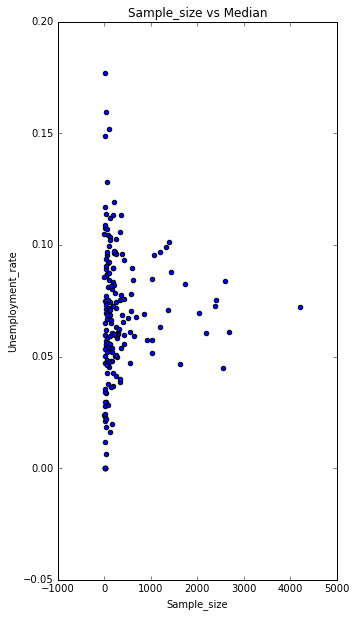

In [14]:
recent_grads.plot(x ="Sample_size",y="Unemployment_rate",kind = "scatter",title="Sample_size vs Median",figsize=(5,10))

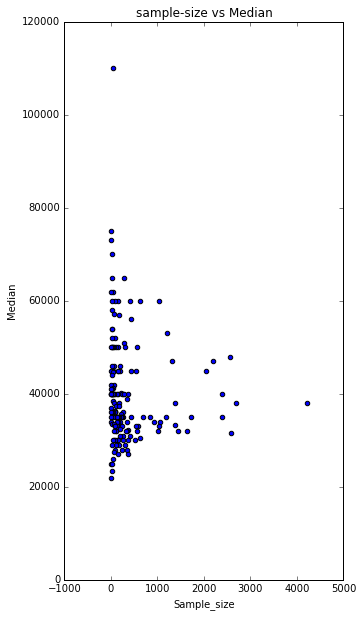

In [15]:
recent_grads.plot(x = 'Sample_size',y='Median',kind = 'scatter',title ='sample-size vs Median',figsize = (5,10))

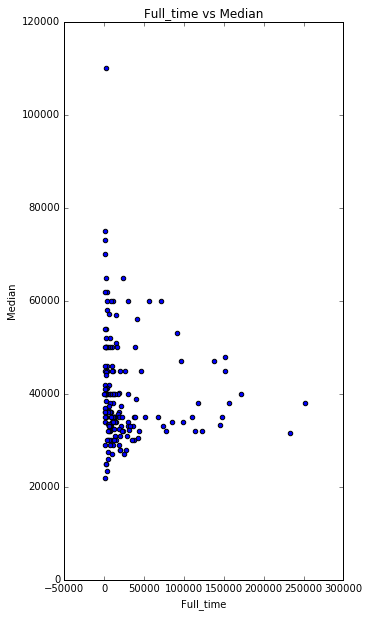

In [16]:
recent_grads.plot(x = 'Full_time',y='Median',kind = 'scatter',title = 'Full_time vs Median',figsize = (5,10))

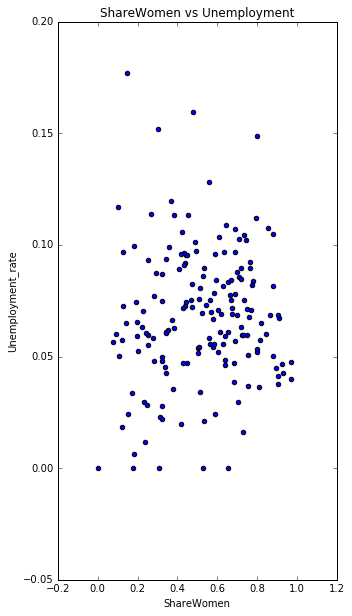

In [17]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title ='ShareWomen vs Unemployment',figsize = (5,10))

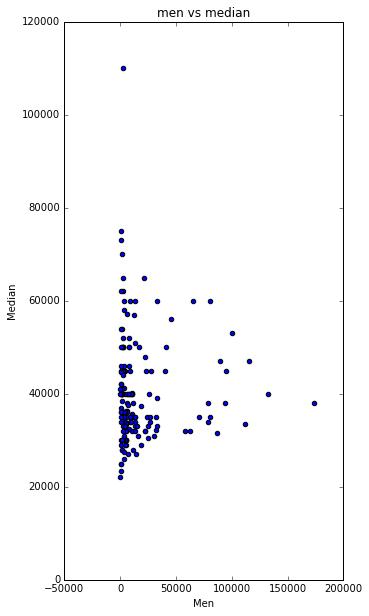

In [18]:
recent_grads.plot(x='Men',y='Median',kind='scatter',title = 'men vs median',figsize = (5,10))

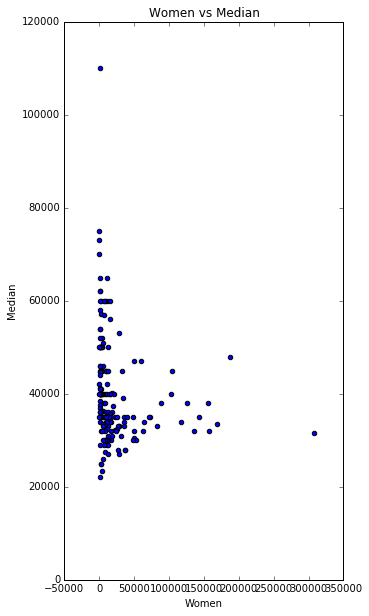

In [19]:
recent_grads.plot(x='Women',y='Median',kind='scatter',title = 'Women vs Median',figsize =(5,10))

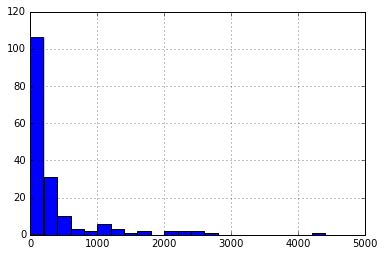

In [20]:
recent_grads["Sample_size"].hist(bins = 25,range=(0,5000))

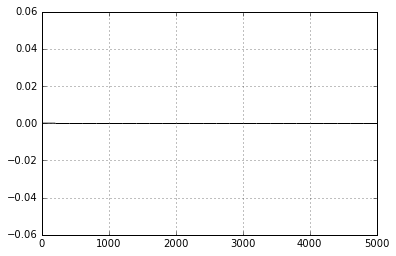

In [21]:
recent_grads['Median'].hist(bins=25,range =(0,5000))

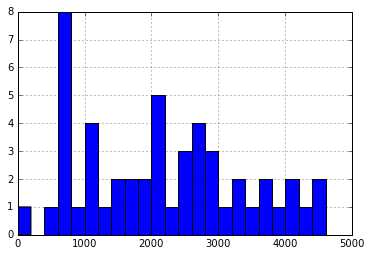

In [22]:
recent_grads["Employed"].hist(bins =25,range=(0,5000))

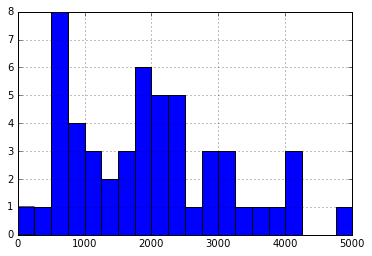

In [23]:
recent_grads['Full_time'].hist(bins = 20, range=(0,5000))

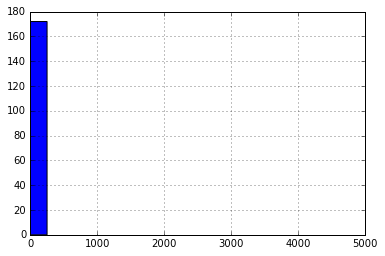

In [24]:
recent_grads['ShareWomen'].hist(bins=20,range=(0,5000))

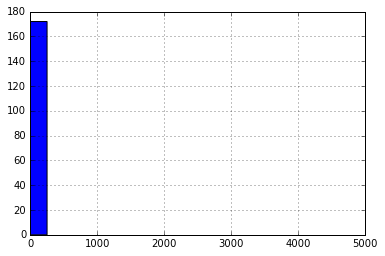

In [25]:
recent_grads['Unemployment_rate'].hist(bins = 20,range=(0,5000))

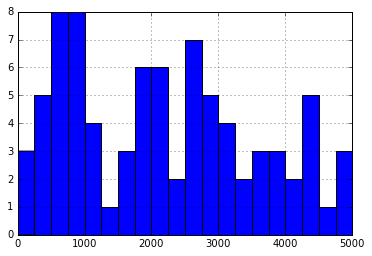

In [26]:
recent_grads['Men'].hist(bins = 20,range=(0,5000))

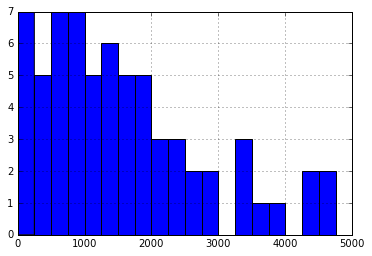

In [27]:
recent_grads['Women'].hist(bins=20,range=(0,5000))

In [28]:
from pandas.plotting import scatter_matrix


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3709d9470>,
      dtype=object)

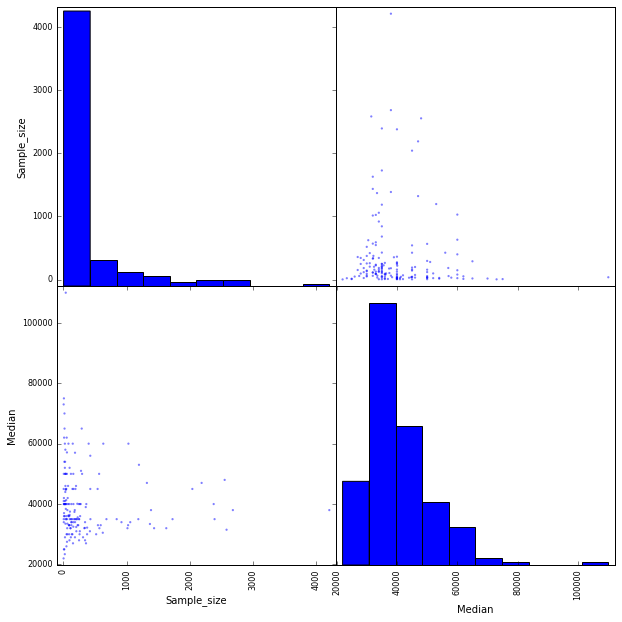

In [29]:
scatter_matrix(recent_grads[["Sample_size","Median"]],figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff370763c18>,
      dtype=object)

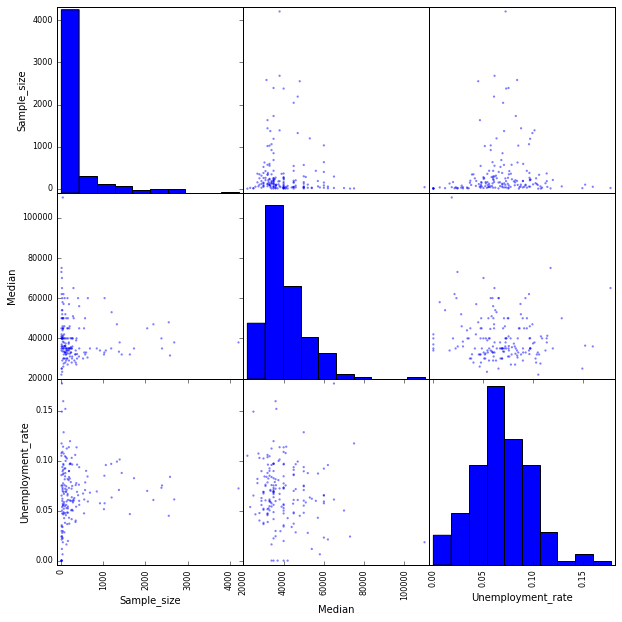

In [30]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))

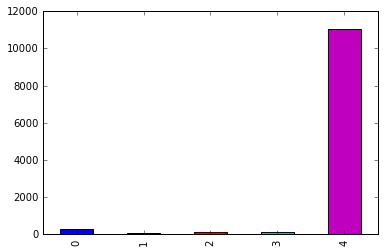

In [31]:
recent_grads[:5]['Women'].plot(kind='bar')

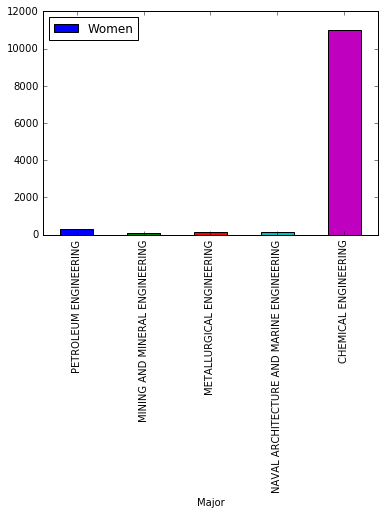

In [32]:
recent_grads[:5].plot.bar(x='Major',y='Women')

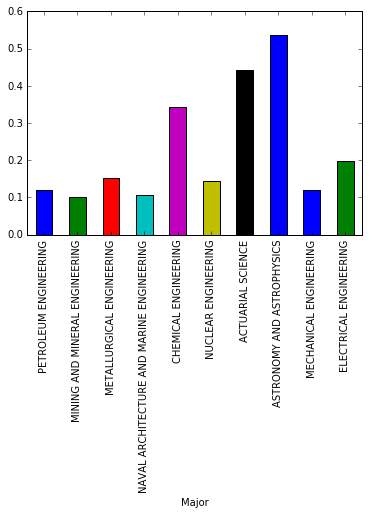

In [33]:
recent_grads[:10].plot.bar(x='Major',y="ShareWomen",legend=False)

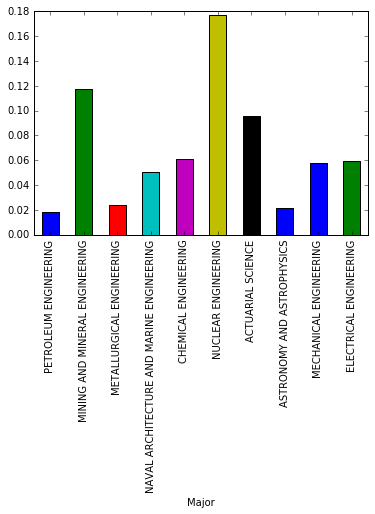

In [34]:
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate',legend = False)

We could deduce from here that,nuclear engineering graduates have a high rate of unemployment. Thos this can be linked to the fact that there are few nuclear station.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff370559978>,
      dtype=object)

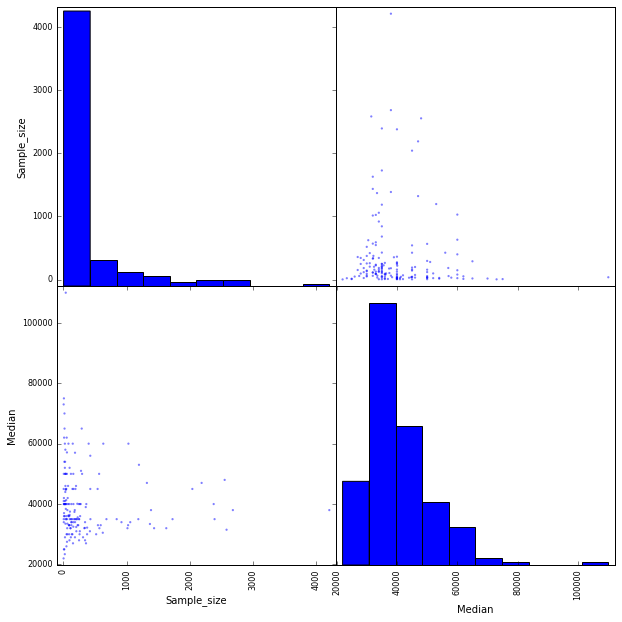

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[["Sample_size","Median"]],figsize =(10,10))

## Box plot

{'boxes': [<matplotlib.lines.Line2D at 0x7ff36ffd0898>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff36ffd7f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff36ffe2860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff36ffde908>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff36ffd0fd0>,
  <matplotlib.lines.Line2D at 0x7ff36ffd77f0>]}

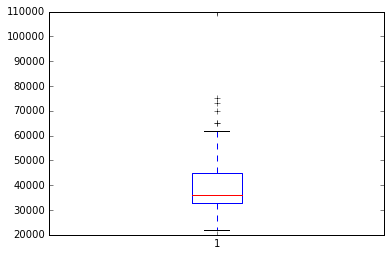

In [36]:
plt.boxplot(recent_grads["Median"])

{'boxes': [<matplotlib.lines.Line2D at 0x7ff36ff45da0>],
 'caps': [<matplotlib.lines.Line2D at 0x7ff36ff4dd68>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff36ff59d30>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7ff36ff53dd8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7ff36ff45f28>,
  <matplotlib.lines.Line2D at 0x7ff36ff4dc50>]}

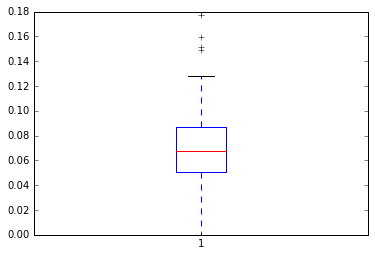

In [37]:
plt.boxplot(recent_grads["Unemployment_rate"])

From the above visualization we could see that the data is more spread when it comes to unemployment than in median salary

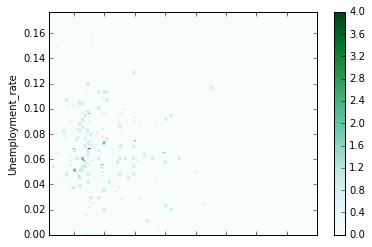

In [38]:
recent_grads.plot.hexbin(x ='Median',y='Unemployment_rate')

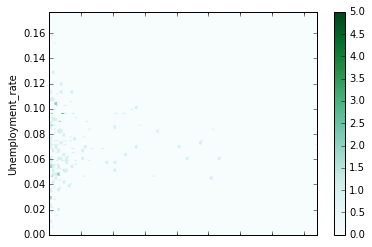

In [41]:
recent_grads.plot.hexbin(x='Sample_size',y='Unemployment_rate')

From here we could see that median to unemployment is more denser than Sample size to unemployment rate